# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

**Does the Smartcab move at all during the simulation?**

No, the cab is not moving

**What kind of rewards is the driving agent receiving?**
**How does the light changing color affect the rewards?**

The car seems to stand near a red light, and waits/takes no action.
This creates rewards when the light is red (as the car is supposed to stand still then,
but creates negative rewards if the light turns green.
The statement "Agent not enforced to meet deadline" could mean that there is no reason to put the foot down, so to speak.

Restarting the simulation produces the same results, though the cab stands still at a different intersection.





### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.**

class LearningAgent, flag learning: according to the comments, indicates whether the agent is supposed to learn. but nothing is implemneted  either in the LearningAgent nor in the Agent base class, so it doesn't really affect the simulation at all as it is.

Class Environment, initialization variables:
flag: grid_size: tuple, number of interesections in the playing field
num_dummies: number of other cars driving around in the grid


**In the environment.py Python file, what Environment class function is called when an agent performs an action?**
function act(agent,action) is called. It will check whether the action violates a traffic law (i.e. running a red light), and then (independently from this) whether it will crash with another car if its path will intersect with our agent.



**In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?**
render_text produces the text output on the console, render() is only called when the display flag is set and produces the GUI from pygame
 

**In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?**
First it checks east-west, if it has already reached the correct longitude, it checks north-south.
It will not correct for south-north as long as it is going the right east-west direction.

It looks that some of the code lines will never be executed, since the conditions (dx>0) cannot be true at this point in the code.








-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


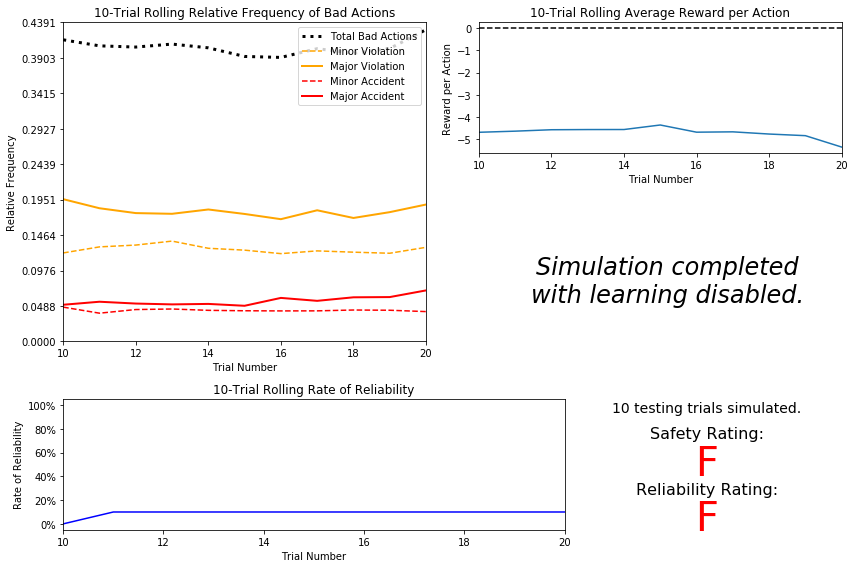

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

- *Given that the agent is driving randomly, does the rate of reliability make sense?*

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

- *As the number of trials increases, does the outcome of results change significantly?*

- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*


**Answer:**
:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

it choise badly on average approx. 40% of the time. 5% of it resulted in major accidents, 4% in minor accidents.
- *Given that the agent is driving randomly, does the rate of reliability make sense?*

Bad decisions: rouhghly yes, assume traffic lights arey 50% green/50% red, we can have the following situations:
Red: 50% bad decisions if no other cars are present (right turn and stay are ok)
Green: 25% bad decisions (stay is bad)
So in the absence of other cars, I would expect 0.5*0.5+0.5*0.25=37.5% bad decisions, which is roughly what we see if we put dummies to 0.

These numbers change as we add additional dummies, a bad decision can also be if no formal violation of traffic laws are done but there can still be an accident. 

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
Penalties are larger in magnitude than rewards. 
Positive rewards for staying at red
Negative rewards for running red lights (-10, more penalty if there is oncoming traffic (~-40)
Negative rewards for not taking action at green (-5)
...

- *As the number of trials increases, does the outcome of results change significantly?*
No, running 100 trials and checking console output the rewards dos not change.

- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*
Of course not.... it crashes with other traffic taking literally random actions (not safe!), also it does not reach its destination (not reliable)

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

** Important for Safety **
light
information about other traffic (left, right, conoming)

** Important for Efficiency **
waypoint
deadline: this is a close one.  In principle, information about deadline does not help efficiency nor safety. Maybe one can construct a reward function which rewards increasinly risky behavior the closer to the deadline one is, but that is probably not what one wants
Edit: I now see that in environment.py, ineed a reward function based on the deadline is included.
10^(t/(t+deadline))/(9). I don't understand this to be honest: the car gets a waypoint it has to follow, why should the deadline have any effect on this? One cannot make up for lost time if one drives optimally...
In any case, I do not see the point in using the deadline information in this situation, I do not want the behavior of the cab to change with the deadline, also I want to limit the number of states (and deadline would add an order of magnitude)

To drive safely, we need surely to know the information about the lights. Assuming the other agents drive safely, that should be enough to not cause an accident.

To drive as efficiently as possible, we surely should get the information about the waypoint. Also, my cab should also have the opportunity to take advantage of this wonderful US law that one can take a right turn on red if there is no other traffic coming. So, we need also information about traffic from the left and oncoming should be included. We can ignore traffic from the right assuming no U-Turn happen in this game. 

Thus, we need the following variables.

waypoint
light
left
oncoming



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

waypoint: {forward,left,right}
light: {red,green}
oncoming: {None, left,forward,right}
left: {None,left,forward,right}

This creates 2*3*4*4=96 states

I would exclude deadline from the statespace, as mentioned above, lost time cannot be regained, unless one changes the risk profile, i.e. start breaking rules. Lets leave that for now.

96 states seems ok. If we can run for a couple of 100 trial runs, and for each we take 10 decisions, we should be able to visit every state a few times.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

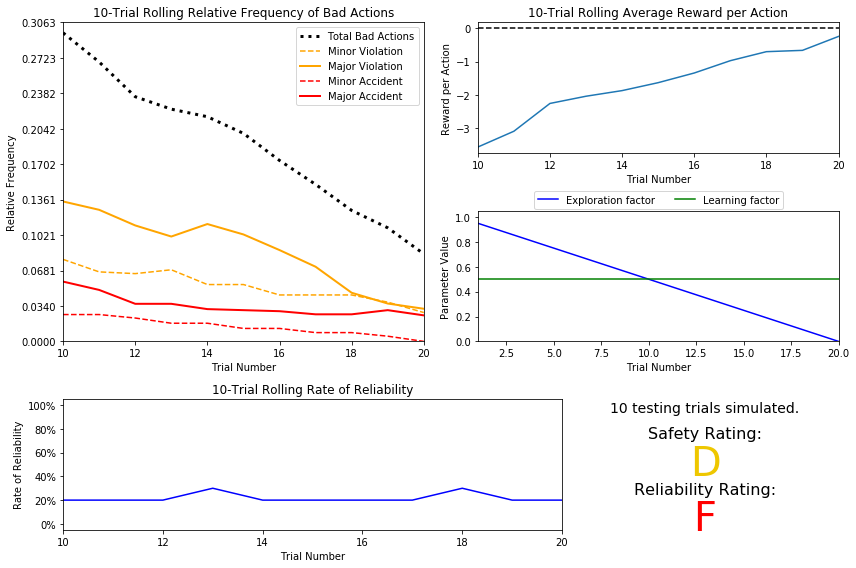

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**
Reliability does not improve

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

not sure I understand... this is hard coded in simulator.py to 20, which makes perfect sense with epison=20.
after this, the exploration phase is done, and only optimal actions are chosen

**Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?**
yes, exploration factors decays linearly with 0.05 per trial over 20 trials, as expecte

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**
yes, fraction of bad actions decreased from 30% to about 8%. Reward increased as well

**How does the safety and reliability rating compare to the initial driving agent?**
Improved the safety, but not the reliability.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

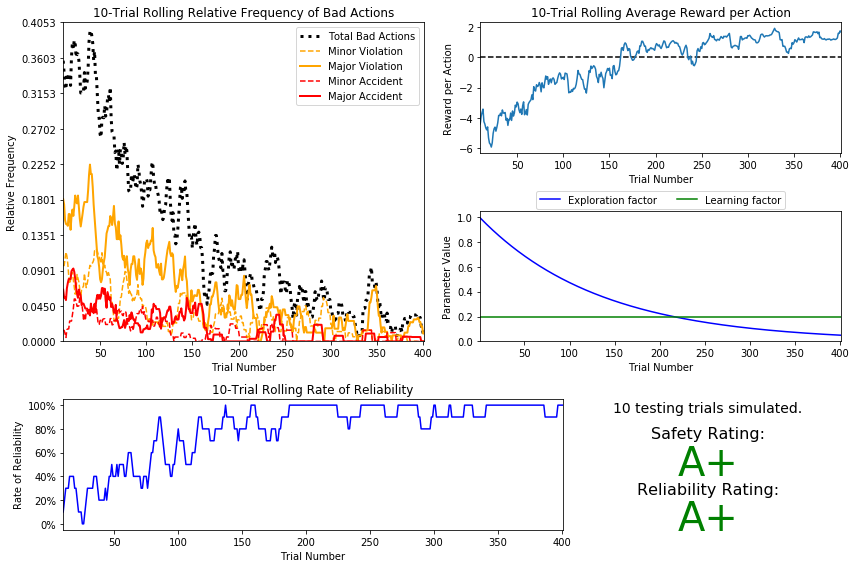

In [24]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  


- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*


**Answer:**


- **What decaying function was used for epsilon (the exploration factor)?**

An exponential decaying function. The decay rate was chosen such that I can specify the number of training runs and it reaches the tolerance of 0.05 after the specified number of training runs. I tried exponential decay as a first try after linear decay, and it worked out nicely. I wanted the cab to explore a lot at the beginning, and then less.

- **Approximately how many training trials were needed for your agent before begining testing?**
400

- **What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**
Kept the epsilon tolerance the same, but adapted the decay rate for the epsion such that it came out to 400 training runs. Alpha I used was 0.2, empirically I found that low alpha values e.g. 0.2 performs better than high values for the reliability (it does not seem to make a difference for the safety rating). However, after thinking about this again at first I came to the conclusion that this does not really make sense, the learning rate should not have an influence. The state completely models the whole reward function; the same action in the same state will always give the same reward. So I reran with alpha=1.0 and got similar results, however reliability was sometimes just A and not A+.

Then I revisited the environment implementation and noticed that the reward is initialized randomly in the interval [-1,1]. This is small relative to the safty relevant penalties, which probably explains why the alpha parameter has no influence on the safty rating, since these negative rewards are much larger in magnitude than the reliability related ones. For fun I removed the randomness in the reward and then with alpha=1.0 I got reliable A+ ratings.

So I changed everything back to how it originally was, random rewards and a learning factor of 0.2. 
I understand this now with respect to how large the random component is with respect to the reliability rewards, we need a few examples to smooth out the variations so the agent can choose between the various valid actions which might be not ideal for high reliability (e.g. idling with waypoint right on red when no traffic is coming, the reward for this is only 1 less than actually turning right, this might be lost in the randomness).

- **How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**
A lot .... Now both safety and reliability are at A+

- **Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**
Looks good to me.  All bad actions, major and minor accidents and violoations decay steadily until they are at a really low value.  Reliability goes up. Only thing I don't like very much is that the reliability fluctuates, albeit on a high level, which would make the realiability rating fluctuate from A to A+

- **Are you satisfied with the safety and reliability ratings of the *Smartcab*?**
Yes, it cannot get better. But to be honest: I think this rating is not entirely fair. The saftey rating is dependent on single occurences. 10 test runs is not a lot, increasing it will increase the chance for a major violation and thus in the limit of a lot of drives give a bad safty rating

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.**


**Green light:**
* waypoint right or forward: follow waypoint
* waypoint left: None if oncoming traffic = right or forward


**Red light** 
* waypoint right: follow waypoint if no traffic from left with forward
* all other waypoints: Idle, i.e. action None

**Next, investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?**
In general, the cab learned the optimal pretty well. In particular, when the light is red it does not seem to take any action which endangers the cab.



**Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.**

#state = (waypoint,inputs['light'],inputs['left'],inputs['oncoming'])

The cab should turn right on a red light if there is no danger from the traffic from left to right. Seems it works out well!
('right', 'red', 'left', 'forward')
 -- forward : -4.84
 -- right : 1.80
 -- None : 0.00
 -- left : -9.57
 
 The cab should wait on a red light with waypoint forward.
 ('forward', 'red', 'right', 'left')
 -- forward : -6.35
 -- right : 0.16
 -- None : 2.17
 -- left : -7.22
 




**Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state.**

I find this one interesting: it should go forward, the light is red. The optimal policy is do nothing, however, the cab turns right. Which is allowed, since from the left and oncoming traffic there is no danger in this state. In fact, it might be even better than the optimal policy defined by me since the planner routes a conservative rectangle route, instead of going a diagonal. Contrast this to the state in the previous questions, where the same waypoint is given for the red light, but the oncoming traffic is turning left and is thus a danger. The cab waits!

('forward', 'red', 'left', 'right')
 -- forward : 0.00
 -- right : 0.62
 -- None : 0.00
 -- left : 0.00
 
 This one is a loss in efficiency: the cab should turn right on green, but chooses to go forward.
 
 ('right', 'green', None, 'forward')
 -- forward : 0.65
 -- right : 0.29
 -- None : -4.12
 -- left : -13.47




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!


### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The environment gives rewards based on choosing the action the planner gave the smartcab, it does not give rewards for reaching the goal.

The cab has essentially a GPS navigation device\. So we need only to teach it to blindly follow the instructions, and the instructions specify exactly what is needed to be done in the next step. This also means the cab has no knowledge about its larger purpose/goal. There are no states which are "closer" to the goal than others.
So, in the Q-Learning Equation:
$Q(s_t,a)=(1-\alpha)* Q(s_t,a)+\alpha*(R_t+\gamma \max_a Q(s_{t+1},a))$
The $Q(s_{t+1},a)$ state does not encode anything which relates how "close" the state is to the goal.
Another issue:  the current state and the action the cab takes do not influence the next next (or only very indirectly through the position in the enviornment determines the waypoint).

One could encode the position of the cab relative to its goal in the state space, and the environment could reward the cab for choosing the right action based on its relative position. If these rewards are uniform accross positions, i.e. essentially encode what the planner does now, this would still not work with a discount factor. Only if the rewards get larger the closer the agent to the goal is, then a discount factor would work. 

In the extreme case, no immediate rewards would be given for any action chosen, but only a big reward when the goal is reached. 


**Regarding the environment:**

It seems I'm at a loss here.... Maybe I didn't express myself clearly, or I'm missing something. In any case, I do not understand the issue with the following environmental characteristics.
1. We map the world of any training run to one in which the destination is at the origin of a coordinate system, i.e. always at the same place (of course, it does not have to be the origin, just out of convenience)
2. We encode the position of the cab relative to the destination in the state of the cab. Starting point for the cab will be different for each training run, but that just means the cab starts in a different state
3. With 1+2, for each run the same states are available.
4. We reward arrival at the destination with a high value, otherwise no rewards for route choices, only for following traffic rules.
5. The first time the agent finds the target by accident, the reward will start to "diffuse out" from the destination.

I thought the toroid symmetry helps with this, we need some kind of symmetry to be able to map each world into the same one and make all states available in each run.

From the review: "the following question need answering: Do the agent and the destination begin each trial in the same place, or do they move around? Can the agent learn the best route by rote?"

For me this question translates to: does the agent always start at the same state? (the destination is always at the same place in the newly mapped world)
=> The agent starts at a different place and thus state. But I do not see how this is a problem.

Can the agent learn the best route by rote?
=> I think so, given enough time to find the destination, especially at the beginning when it does not know the "true" Q-Values of the different states/positions. 

Maybe one could improve the learning speed by letting the agent start close to the destination, e.g. by not sampling the starting point uniformly over the grid, but e.g. from a distribution with more mass around the destination. Not sure whether this creates any unwanted bias



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.